In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
from google.colab import files
uploaded = files.upload()

Saving exercise.csv to exercise (1).csv
Saving calories.csv to calories (1).csv


In [4]:
data1 = pd.read_csv('calories.csv')
data2 = pd.read_csv('exercise.csv')


In [5]:
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
data2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
data = pd.merge(data1, data2, how = "outer")
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df = pd.DataFrame(data)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
df.shape

(15000, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [12]:
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


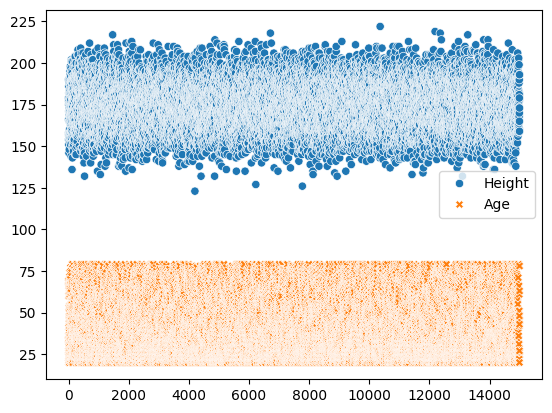

In [13]:
sns.scatterplot([df['Height'],df['Age']])
plt.show()

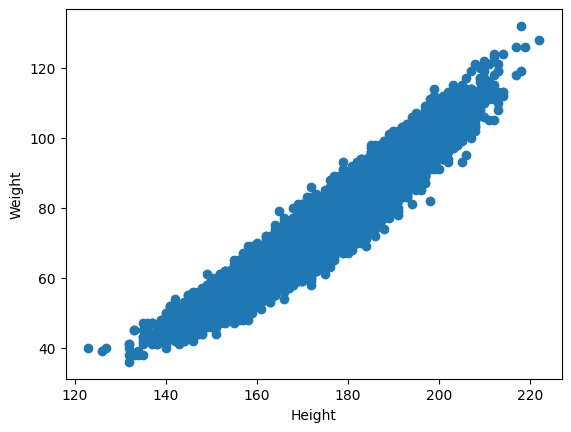

In [14]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

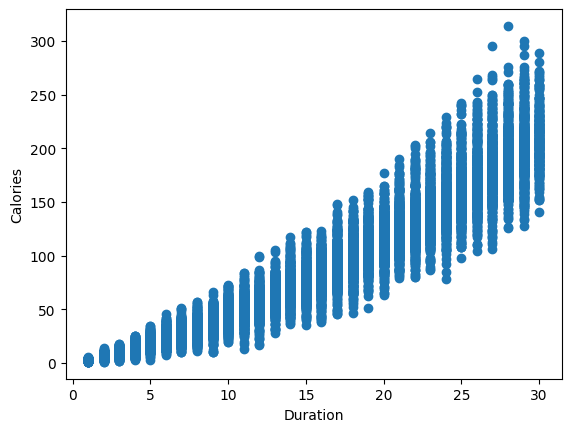

In [15]:
plt.scatter(df['Duration'],df['Calories'])
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

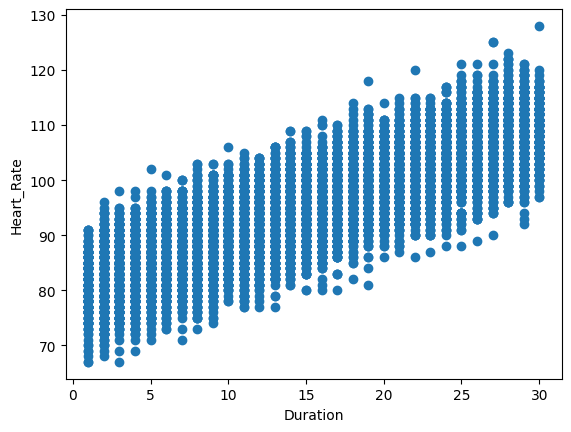

In [16]:
plt.scatter(df['Duration'],df['Heart_Rate'])
plt.xlabel("Duration")
plt.ylabel("Heart_Rate")
plt.show()

In [17]:
from sklearn.preprocessing import normalize

In [18]:
df['Gender'].replace({'male': 0, 'female' : 1},inplace = True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


<Axes: >

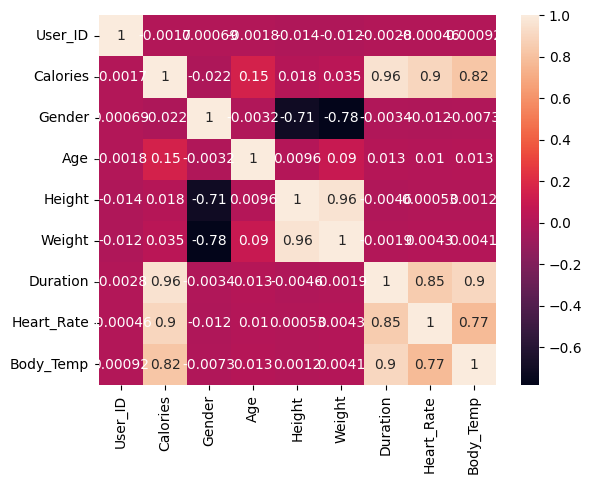

In [19]:
sns.heatmap(df.corr(),annot = True)

In [20]:
df.drop(['Weight','Duration','Heart_Rate'],inplace = True, axis = 1)

In [21]:
df.head()

,User_ID,Calories,Gender,Age,Height,Body_Temp
0,14733363,231.0,0,68,190.0,40.8
1,14861698,66.0,1,20,166.0,40.3
2,11179863,26.0,0,69,179.0,38.7
3,16180408,71.0,1,34,179.0,40.5
4,17771927,35.0,1,27,154.0,39.8


In [22]:
target = df['Calories']


In [23]:
useless_cols = ['User_ID','Calories']
df.drop(useless_cols,inplace = True, axis = 1)

In [24]:
target

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
5,123.0
6,112.0
7,143.0
8,134.0
9,72.0


In [25]:
features = df.columns
df[features].head()

,Gender,Age,Height,Body_Temp
0,0,68,190.0,40.8
1,1,20,166.0,40.3
2,0,69,179.0,38.7
3,1,34,179.0,40.5
4,1,27,154.0,39.8


In [26]:
x_train, x_test, y_train, y_test = train_test_split(df[features], target, train_size = 0.8 )

In [27]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (12000, 4)
y_train shape:  (12000,)
x_test shape:  (3000, 4)
y_test shape:  (3000,)


In [28]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
print("x_train:", x_train)
print("x_test:", x_test)


x_train: [[ 0.99385223  1.18521674 -0.94188671  0.48505963]
 [ 0.99385223 -0.22905273 -0.59047578  0.86797625]
 [ 0.99385223 -0.70047588 -0.44991141 -0.02549586]
 ...
 [-1.0061858  -1.34868272  0.53403919 -3.21646769]
 [-1.0061858  -0.87725957  0.81516793 -0.02549586]
 [ 0.99385223  2.01020727 -1.0121689  -0.66369023]]
x_test: [[-1.01072417  0.32909519 -0.11965936  0.20042549]
 [-1.01072417  0.74053766  0.0195064  -0.45613323]
 [ 0.98938962 -0.43501224 -1.02423677 -2.42580942]
 ...
 [ 0.98938962  0.56420517 -1.37215115  0.33173724]
 [-1.01072417 -1.25789717  1.48074683  0.98829597]
 [-1.01072417 -1.08156469 -0.11965936 -3.08236815]]


In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
models = [LinearRegression(), RandomForestRegressor()]
for i in range(2):
  models[i].fit(x_train, y_train)
  print(f'{models[i]} : ')
  train_preds = models[i].predict(x_train)
  print('training error: ',mean_absolute_error(y_train, train_preds))
  val_preds = models[i].predict(x_test)
  print('validation error: ',mean_absolute_error(y_test, val_preds))


LinearRegression() : 
training error:  27.56187563950511
validation error:  27.053848310349277
RandomForestRegressor() : 
training error:  8.36857730489418
validation error:  20.787927116402113
